In [2]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.5.1'

### Carregar e mostrar imagem

#### OpenCV

In [3]:
imagem_original = cv2.imread('yodinha.jpg')
imagem_gray = cv2.imread('yodinha.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('Yodinha colorido', imagem_original) # mostra a imagem_original em uma janela nomeada "Yodinha colorido"
cv2.imshow('Yodinha desbotado', imagem_gray) # mostra a imagem_grayscale na janela "Yodinha desbotado"

cv2.waitKey(0) # irá rodar infinitamente até qualquer tecla ser pressionada
cv2.destroyAllWindows() # destruirá a janela assim que chegar aqui

#### Matplotlib

(2920, 2192, 3)


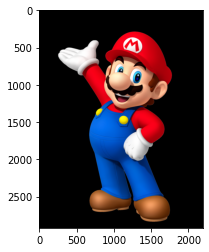

In [5]:
imagem_original = cv2.imread('yodinha.jpg')

# Opcionalmente poderiamos fazer o loading usando o matplotlib
# plt.imread(<nomedoarquivo>)
# O load seria feito com ordem dos canais RGB

# Para mostrar através do matplotlib devemos inverter o primeiro e último canal, 
# pois o OpenCV carrega e mostra os canais como BGR e matplotlib carrega e lê como RGB
plt.imshow(imagem_original[:,:,::-1])
plt.show()

### Medidas da imagem

In [7]:
# Imagem colorida
imagem_original.shape

<class 'tuple'>


In [14]:
# Imagem em grayscale
imagem_gray.shape

(260, 462)

### Cortar Imagem

In [15]:
img = cv2.imread('yodinha.jpg')
img_cut = img[25:175, 150:350]

cv2.imshow('Yodinha', img) 
cv2.imshow('Yodinha cortado', img_cut)

print('Tamanho original', img.shape)
print('Tamanho do corte', img_cut.shape)

cv2.waitKey(0) 
cv2.destroyAllWindows() 

Tamanho original (260, 462, 3)
Tamanho do corte (150, 200, 3)


### Redimensionar imagem

In [16]:
# Redimensionando por novo shape
imagem_original = cv2.imread('yodinha.jpg')

imagem_original_rs = cv2.resize(imagem_original, (200,200)) # modificando para 200x200

cv2.imshow('Yodinha colorido', imagem_original) # mostra a imagem_original em uma janela nomeada "Yodinha colorido"
cv2.imshow('Yodinha colorido resized', imagem_original_rs) # mostra a imagem_original na janela "Yodinha colorido resized"

cv2.waitKey(0) # irá rodar infinitamente até qualquer tecla ser pressionada
cv2.destroyAllWindows() # destruirá a janela assim que chegar aqui

In [17]:
# Redimensionando por medidas relativas
imagem_original = cv2.imread('yodinha.jpg')

imagem_original_rs_2 = cv2.resize(imagem_original, None, fx=0.3, fy=0.3) # modificando para 30% das medidas originais

cv2.imshow('Yodinha colorido', imagem_original) # mostra a imagem_original em uma janela nomeada "Yodinha colorido"
cv2.imshow('Yodinha colorido resized', imagem_original_rs_2) # mostra a imagem_original na janela "Yodinha colorido resized"

cv2.waitKey(0) # irá rodar infinitamente até qualquer tecla ser pressionada
cv2.destroyAllWindows() # destruirá a janela assim que chegar aqui

### Diferentes Interpolações

In [18]:
imagem_inter_1 = cv2.resize(imagem_original, (200,200), interpolation=cv2.INTER_LINEAR) 
imagem_inter_2 = cv2.resize(imagem_original, (200,200), interpolation=cv2.INTER_CUBIC) 
imagem_inter_3 = cv2.resize(imagem_original, (200,200), interpolation=cv2.INTER_AREA) 

cv2.imshow('Linear', imagem_inter_1)
cv2.imshow('Cubic', imagem_inter_2)
cv2.imshow('Area', imagem_inter_3)

cv2.waitKey(0) # irá rodar infinitamente até qualquer tecla ser pressionada
cv2.destroyAllWindows() # destruirá a janela assim que chegar aqui

### Concatenando Imagens

In [14]:
imagem_1 = cv2.imread('yodinha.jpg')
imagem_2 = cv2.imread('pacman.jpg')

# Ambas imagens devem ter mesma dimensão portanto vamos alterar o tamanho da imagem 2
imagem_2 = cv2.resize(imagem_2, (imagem_1.shape[1], imagem_1.shape[0]))

# Usando OpenCV
imagem_composta_v = cv2.vconcat([imagem_1, imagem_2])
imagem_composta_h = cv2.hconcat([imagem_1, imagem_2])

# Usando Numpy
#imagem_composta_v = np.vstack([imagem_1, imagem_2])
#imagem_composta_h = np.hstack([imagem_1, imagem_2])


cv2.imshow('Imagem composta (V)', imagem_composta_v) 
cv2.imshow('Imagem composta (H)', imagem_composta_h) 

cv2.waitKey(0) 
cv2.destroyAllWindows() 

### Salvando

In [20]:
imagem_original = cv2.imread('yodinha.jpg')
imagem_resized = cv2.resize(imagem_original, (200,200), interpolation=cv2.INTER_AREA) 

cv2.imwrite('yodinha_resized.jpg', imagem_resized)

True

### Captura de Video

#### Webcam

In [21]:
cap = cv2.VideoCapture(0)

while True:
    # Capturando frames
    ret, frame = cap.read()
    
    # Podemos fazer operações frame-a-frame, 
    # por exemplo grayscale:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Demonstrando os resultados
    cv2.imshow('frame', gray)
    
    # Apertando "Q" iremos quebrar o loop
    # O valor do waitKey determinará a duração de cada frame (em ms)
    if cv2.waitKey(1) == ord('q'):
        break

# Quando quebrar o loop iremos destruir as janelas
cap.release()
cv2.destroyAllWindows()

#### Arquivo de Video

In [22]:
import cv2

cap = cv2.VideoCapture('pacman.mp4')

while True:
    # Capturando frames
    ret, frame = cap.read()
    
    # Nesta parte garantimos que o video está rodando
    # Ret é TRUE enquanto tiver frames a serem mostrados
    if not ret:
        break
    
    # Demonstrando os resultados
    cv2.imshow('frame', frame)
    
    # Apertando "Q" iremos quebrar o loop
    # O valor do waitKey determinará a duração de cada frame (em ms)
    if cv2.waitKey(5) == ord('q'):
        break

# Quando quebrar o loop iremos destruir as janelas
cap.release()
cv2.destroyAllWindows()

### Espelhar

In [23]:
import cv2 

# Carregando imagem
img = cv2.imread('Yodinha.jpg') 

cv2.imshow("Original", img) 

#flip_horizontal = img[::-1,:] # usando manipulação de array
flip_horizontal = cv2.flip(img, 1)
cv2.imshow("Flip Horizontal", flip_horizontal) 

#flip_vertical = img[:,::-1] # # usando manipulação de array
flip_vertical = cv2.flip(img, 0)
cv2.imshow("Flip Vertical", flip_vertical) 

#flip_hv = img[::-1,::-1] # # usando manipulação de array
flip_hv = cv2.flip(img, -1) 

cv2.imshow("Flip Horizontal e Vertical", flip_hv) 
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotacionar

In [24]:
img = cv2.imread('Yodinha.jpg') 

(h, w) = img.shape[:2] # obtendo altura e largura 

center = (w // 2, h // 2) # centro 

M = cv2.getRotationMatrix2D(center, 30, 1.0) # rotacionando em 30 graus 
img_rotacionada = cv2.warpAffine(img, M, (w, h))

cv2.imshow('Original', img)
cv2.imshow("Imagem rotacionada em 30 graus", img_rotacionada) 
cv2.waitKey(0)
cv2.destroyAllWindows()

### Desenhar objetos na tela

In [25]:
# Desenhando linhas

# Criando uma imagem base de fundo preto para desenhar por cima
base = np.zeros((500,500))

# Para cv2.line devemos passar (imagem, ponto inicial, ponto final, cor, grossura, estilo da linha[opcional])
# Desenhando uma linha de tamanho 2 na cor branca (255,255,255), no ponto (0,0) até o ponto (250, 250).
cv2.line(base, (0, 0), (250,250), (255,255,255), 2)

cv2.imshow('base_img', base)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
# Desenhando retangulos

# Criando uma imagem base de fundo preto para desenhar por cima
base = np.zeros((500,500))

# Para cv2.rectangle devemos passar (imagem, ponto inicial, ponto final, cor, grossura)
cv2.rectangle(base, (50, 50), (150,150), (255,255,255), 2)

cv2.imshow('base_img', base)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
# Desenhando circulos

# Criando uma imagem base de fundo preto para desenhar por cima
base = np.zeros((500,500))

# Para cv2.circle devemos passar (imagem, ponto central, raio, cor, grossura)
cv2.circle(base, (150, 150), 50, (255,255,255), 2)

cv2.imshow('base_img', base)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# Desenhando objetos PREENCHIDOS (basta passar argumento thickness como -1)

# Criando uma imagem base de fundo preto para desenhar por cima
base = np.zeros((500,500))

# Para cv2.circle devemos passar (imagem, ponto central, raio, cor, grossura)
cv2.circle(base, (150, 150), 50, (255,255,255), -1)

cv2.imshow('base_img', base)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
# Desenhando poligonos

base = np.zeros((500,500,3)) # 3 canais

pts = np.array([[25, 70], [25, 160],  
                [110, 200], [200, 160],  
                [200, 70], [110, 20]], 
               np.int32) 

pts=pts.reshape((-1,1,2))
cv2.polylines(base,[pts],True,(0,255,255))

cv2.imshow("Polygon", base) # Mostrar hexagono
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
# Criando uma imagem base de fundo preto para desenhar por cima
base = np.zeros((500,500))

# Para cv2.putText devemos passar (imagem, texto, ponto referencia, estilo da fonte, escala da fonte, cor, grossura)
cv2.putText(base, 'Hello World', (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2)

cv2.imshow('base_img', base)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Exemplo de aplicação de retangulo + texto

In [31]:
img = cv2.imread('yodinha.jpg')

cv2.rectangle(img, (150, 25), (350,175), (0,0,255), 2)
cv2.putText(img, 'Cara do Yodinha', (150, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
    
cv2.imshow('Yodinha', img)    

cv2.waitKey(0) 
cv2.destroyAllWindows() 

### Espaço de Cores

In [32]:
# Conversão de espaços de cores disponíveis no OpenCV
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [33]:
img = cv2.imread('yodinha.jpg')

# Convertendo a imagem para Grayscale, para RGB e para HSV
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('Yodinha original', img)
cv2.imshow('Yodinha cinza', img_gray)
cv2.imshow('Yodinha com canais trocados (BGR para RGB)', img_rgb)
cv2.imshow('Yodinha HSV', img_hsv)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Dividir canais de cores

In [34]:
img = cv2.imread('yodinha.jpg')

# Separando canais
(b, g, r) = cv2.split(img) 

cv2.imshow('Original', img)
cv2.imshow("Vermelho", r) 
cv2.imshow("Verde", g) 
cv2.imshow("Azul", b) 
cv2.waitKey(0)
cv2.destroyAllWindows()

### Mostrar canais

In [35]:
img = cv2.imread('yodinha.jpg')

# Separando canais
(b, g, r) = cv2.split(img)
# Criando um vetor de zeros de hxw igual ao da imagem original
zeros = np.zeros(img.shape[:2], dtype = "uint8")
# Esse vetor irá substuir os canais que não serão mostrados

cv2.imshow("Vermelho", cv2.merge([zeros, zeros, r]))
cv2.imshow("Verde", cv2.merge([zeros, g, zeros])) 
cv2.imshow("Azul", cv2.merge([b, zeros, zeros])) 
cv2.imshow("Original", cv2.merge([b,g,r])) 
# ou cv2.imshow('Original', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Filtros

In [36]:
# Carregando imagem original
img = cv2.imread('yodinha.jpg')

# Filtro de Blur
kernel1 = np.ones((3, 3), np.float32) / 9
img_blur = cv2.filter2D(img, -1, kernel1)

# Filtro de Sharpen
kernel2 = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
img_sharpen = cv2.filter2D(img, -1, kernel2)

# Resultados
cv2.imshow('Yodinha original', img)
cv2.imshow('Yodinha com blur', img_blur)
cv2.imshow('Yodinha sharpen', img_sharpen)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Funções de Blur 

In [37]:
# Carregando imagem original
img = cv2.imread('yodinha.jpg')

# Filtros de Blur
img_blur_gauss = cv2.GaussianBlur(img, (5,5), 0)
img_blur_median = cv2.medianBlur(img, 5)
img_blur = cv2.blur(img, (5,5))

# Resultados
cv2.imshow('Yodinha com blur simples', img_blur)
cv2.imshow('Yodinha com blur gaussiano', img_blur_gauss)
cv2.imshow('Yodinha com blur de mediana', img_blur_median)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Detecção de Bordas

#### Canny

In [12]:
# Carregando imagem original
img = cv2.imread('valve.png')

# Grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur
img_blur = cv2.blur(img, (3,3))

# Detecção de Bordas
edges = cv2.Canny(img_blur,100,200)
edges_wb = cv2.Canny(img,100,200)

# Resultados
cv2.imshow('Imagem cinza', img)
cv2.imshow('Imagem cinza com Blur', img_blur)
cv2.imshow('Detector de Bordas com Blur', edges)
cv2.imshow('Detector de Bordas sem Blur', edges_wb)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Sobel

In [39]:
# Carregando imagem original
img = cv2.imread('valve.png')

# Grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detecção de Bordas
edges_x = cv2.Sobel(img_gray,-1,1,0, ksize=5)
edges_y = cv2.Sobel(img_gray,-1,0,1, ksize=5)
edges = cv2.Sobel(img_gray,-1,1,1, ksize=5)

# Resultados
cv2.imshow('Imagem original', img)
cv2.imshow('Detector de Bordas com Algoritmo Sobel(x)', edges_x)
cv2.imshow('Detector de Bordas com Algoritmo Sobel(y)', edges_y)
cv2.imshow('Detector de Bordas com Algoritmo Sobel', edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Binarização com Limiar

In [40]:
img = cv2.imread('yodinha.jpg') 

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

blur = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
retval, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY) 
retivalI, threshI = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY_INV) 

resultado = np.vstack([np.hstack([img, blur]), 
                       np.hstack([thresh, threshI])])

cv2.imshow("Binarizacao da imagem", resultado) 

cv2.waitKey(0)
cv2.destroyAllWindows()

### Binarização Adaptativa

In [41]:
img = cv2.imread('Yodinha.jpg',0)

img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

cv2.imshow('Imagem original', img)
cv2.imshow("Binarizacao tradicional", th1) 
cv2.imshow("Binarizacao adaptativa (media)", th2) 
cv2.imshow("Binarizacao adaptativa gaussiana", th3) 

cv2.waitKey(0)
cv2.destroyAllWindows()

### Operações Morfológicas

#### Dilatação

In [42]:
# Carregando imagem original
img = cv2.imread('j.png', 0)
img = cv2.resize(img, None, fx=2, fy=2)

# Kernel
kernel = np.ones((3, 3))

# Dilatação com 2 iterações
dilate = cv2.dilate(img,kernel, iterations=2)

# Resultados
cv2.imshow('Imagem original', img)
cv2.imshow('Dilate', dilate)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Erosão

In [43]:
# Carregando imagem original
img = cv2.imread('j.png', 0)

# Kernel
kernel = np.ones((3, 3))

# Erosão com 2 iterações
erode = cv2.erode(img,kernel, iterations=2)

# Resultados
cv2.imshow('Imagem original', img)
cv2.imshow('Erode', erode)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Segmentação de Cores

In [44]:
# Carregando imagem original
img = cv2.imread('pacman.jpg')
img = cv2.resize(img, None, fx=0.3, fy=0.3)

# Definindo ranges para detectar amarelo
lower_range = (0,200,200)
upper_range = (50,255, 255)

# Aplicando inRange para obter mascara
mask = cv2.inRange(img, lower_range, upper_range)

# Recorte segmentado
segm = cv2.bitwise_and(img, img, mask=mask)

# Resultados
cv2.imshow('Imagem original', img)
cv2.imshow('Mascara de cor', mask)
cv2.imshow('Objeto Segmentado', segm)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# Carregando imagem original
img = cv2.imread('pacman.jpg')
img = cv2.resize(img, None, fx=0.3, fy=0.3)

# Definindo ranges para detectar amarelo
lower_range = (0,200,200)
upper_range = (50,255, 255)

# Aplicando inRange para obter mascara
mask = cv2.inRange(img, lower_range, upper_range)

# Obtendo contorno da cor escolhida
c, h = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Resultados
cv2.imshow('Imagem original', img)

# Copiando imagem para manter a original
img_copy = img.copy()
img2_copy = img.copy()

# Desenhando contornos na imagem
for cnts in c:
    # Desenhando o contorno obtido
    cv2.drawContours(img_copy, cnts, -1, (0, 255, 0), 3)
    # Obtendo retangulo referente ao contorno
    (x,y,w,h) = cv2.boundingRect(cnts)    
    # Definindo tamanho minimo
    cv2.rectangle(img2_copy, (x,y), (x+w, y+h), (0,255,0), 2, cv2.LINE_AA)

# Desenhando contorno
cv2.imshow('Contorno', img_copy)

# Desenhando contorno retangular
cv2.imshow('Contorno retangular', img2_copy)

# Obtendo apenas recorte
img_cut = img[y:y+h, x:x+w]
cv2.imshow('Recorte', img_cut)


cv2.waitKey(0)
cv2.destroyAllWindows()